# Milestone 2 EDA on Art(ists)(work)

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

def load_and_process(path):
       #(Load data and deal with missing data)
    df = (
        pd.read_csv(path)
        .dropna()        )
    return df

def clean_date(row): # some dates are ranges. this function choses the start date
    if(len(row.Date)>4):
        x = row.Date.split('-')
        row.Date = x[0]

    return row.Date    
def clean_df_artworks(artworks):
    df_cleaned = artworks.copy()
    df_cleaned['Date'] = df_cleaned.apply(lambda row: clean_date(row), axis=1)
    return df_cleaned

In [167]:
path_artists  = "../../data/raw/artists.csv"
path_artworks = "../../data/raw/artworks.csv"

df_artists = load_and_process(path_artists) # all these artists are dead
df_artworks = pd.read_csv(path_artworks)
df_artworks = clean_df_artworks(df_artworks[df_artworks['Date'].notna()])

# cleaning
df_artists= df_artists[df_artists.Gender != 'male'] #got rid of one mismarked row
df_artists = df_artists[df_artists.Nationality != 'Nationality unknown'] # some artists have an unknown nationality, got rid of that

## Gender
One of my research questions was to determine the gender gap in artists

Artist ID      7.85743
Name           7.85743
Nationality    7.85743
Gender         7.85743
Birth Year     7.85743
Death Year     7.85743
dtype: float64

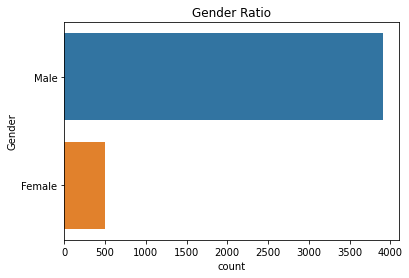

In [168]:
gender = sns.countplot(y='Gender',data=df_artists).set_title('Gender Ratio')
male_female_ratio = (df_artists[df_artists.Gender == 'Male'].count()/df_artists[df_artists.Gender == 'Female'].count())
male_female_ratio

We can see that for every female artist in MoMA, there are 7.82 males

### American Gender Ratio
Let's see the American male and female chart:

Artist ID      5.746154
Name           5.746154
Nationality    5.746154
Gender         5.746154
Birth Year     5.746154
Death Year     5.746154
dtype: float64

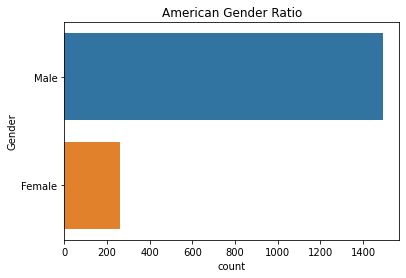

In [169]:
df_am_gender = df_artists[df_artists['Nationality']=='American']
gender_am = sns.countplot(y='Gender',data=df_am_gender).set_title('American Gender Ratio')
am_male_female_ratio = (df_am_gender[df_am_gender.Gender == 'Male'].count()/df_am_gender[df_am_gender.Gender == 'Female'].count())
am_male_female_ratio

The American male to female ratio is 5.75, which is better.

## Nationality 
I want to see which which Nationality is the most represented in the MoMA artists

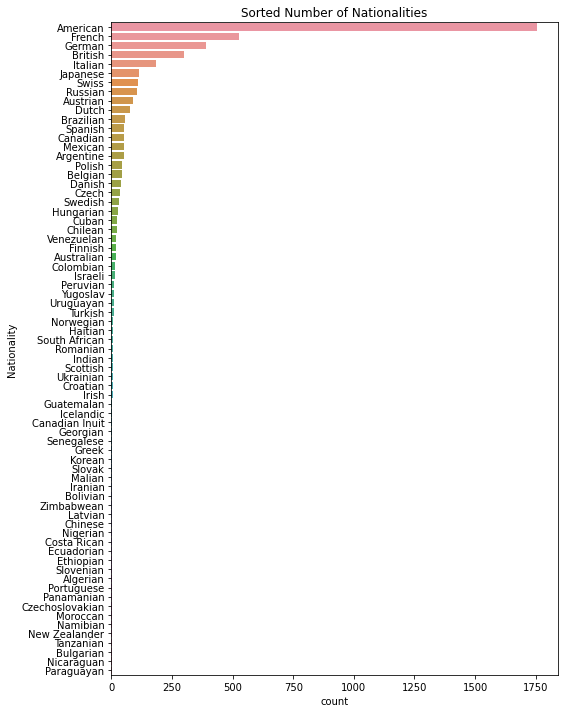

In [170]:
nationality=sns.countplot(y='Nationality',data=df_artists,order = df_artists['Nationality'].value_counts().index).set_title('Sorted Number of Nationalities')
fig = plt.gcf()
fig.set_size_inches(8, 12)

Top 5 Nationalities (by : American, French, German, British, Italian

## Age
I am going to see if there is anything in Birth Year and Death Year

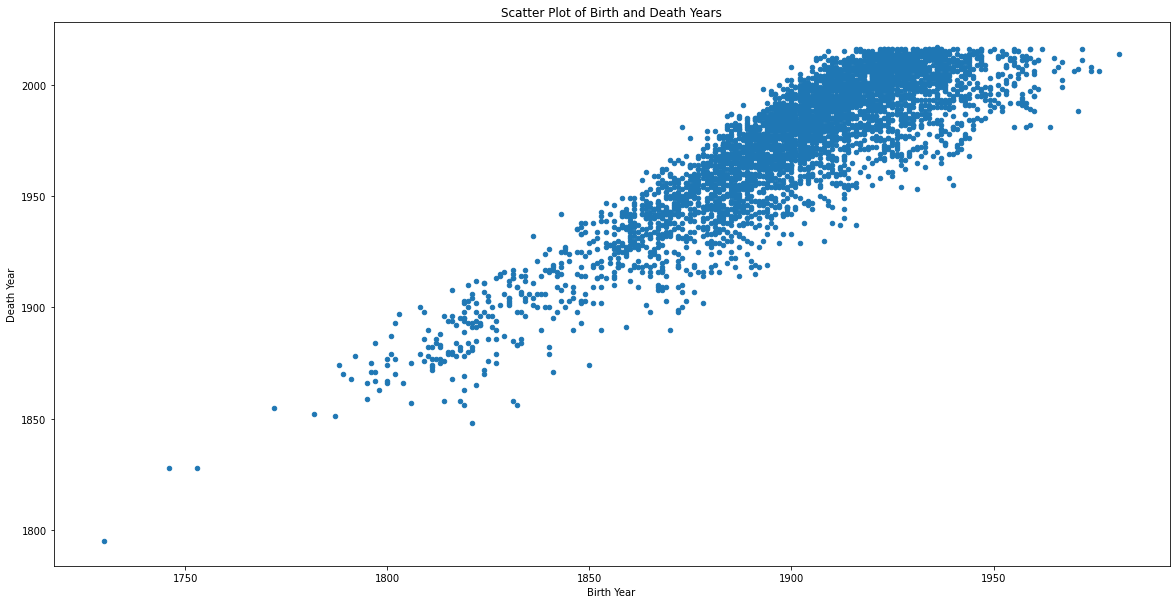

In [171]:
df_artists.plot(kind='scatter', x='Birth Year', y='Death Year').set_title('Scatter Plot of Birth and Death Years')
fig = plt.gcf()
fig.set_size_inches(20, 10)

From scatter plot, I can see that the definition of "Modern" works are created by artists born around the late 1800's. So "Modern" most popularily
means post-1900's.

72.79596463386987

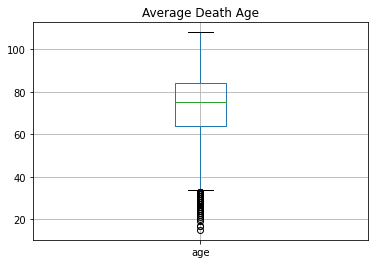

In [172]:
df_artists['age']=(df_artists['Death Year']-df_artists['Birth Year'])
df_artists
df_artists.boxplot('age').set_title('Average Death Age')
df_artists['age'].mean()


The average artist in this dataset did at the age of 72.8.

## Artwork

In [173]:
df_artworks.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN


What are the 5 most popular Classifications?

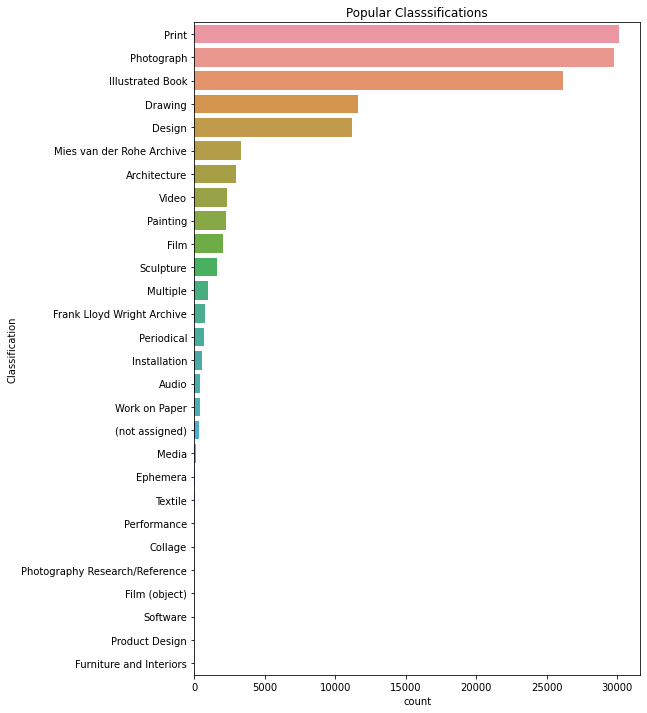

In [200]:
plot_class=sns.countplot(y='Classification',data=df_artworks,order = df_artworks['Classification'].value_counts().index).set_title('Popular Classsifications')
fig = plt.gcf()
fig.set_size_inches(8, 12)

Top 5 Classifications: Print, Photograph, Illustrated Book, Drawing, and Design